# <center> <font color='blue'> Heart Disease Prediction Model</font></center>

## <font color='black'>📜 Context: </font>
In this project we will use multivariat type of dataset which means providing or involving a variety of separate mathematical or statistical variables. It is composed of 12 attributes. The major task is to predict based on the given attributes of a patient that whether that particular person has a heart disease or not.

### <font color='red'>💻 The machine learning models used in this project are: </font> 
1. Support Vector Machine (SVM)
2. K-Nearest Neighbour (KNN)
3. Logistic Regression
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Neural Network
8. LinearDiscriminantAnalysis
9.  Gradient Boosting
10. Ada Boost

<a id="0"></a>
# 📝check list:


#### [1.📚 Importing Libraries](#1)
#### [2.📂 Loading Data](#2)
#### [3.🧐 Data Wrangling](#3)
  #### _🚫 Missing Values
  #### _👁‍🗨 DataTypes
  #### _🔃 Duplicates
#### [ 4.📊 EDA](#4)
  #### _🔢 Numeric Columns
  #### _🔠 Categorical Columns
#### [5.🛠 Feature Engineering ](#5)
  #### _👨🏽‍💻 LabelEncoder 
#### [6.🔭 correlations ](#6)
#### [7.🏗 Model Building](#7)
  #### _ 🗃 Splitting Data
  ####  _Train & Test Models
#### [8.🥇 Saving The Best Model](#8)



<a id="1"></a>
# <font color='green'> 📚 Importing Libraries</font>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="2"></a>
# <font color='green'> 📂  Load Data:</font>

In [758]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="3"></a>
# <font color='green'> 🧐 Data Info:</font>


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [304]:
df.duplicated().sum()

0

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="4"></a>
# <font color='green'> 📊 Exploratory Data Analysis (EDA):</font>


### 1-Numeric Columns

In [305]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


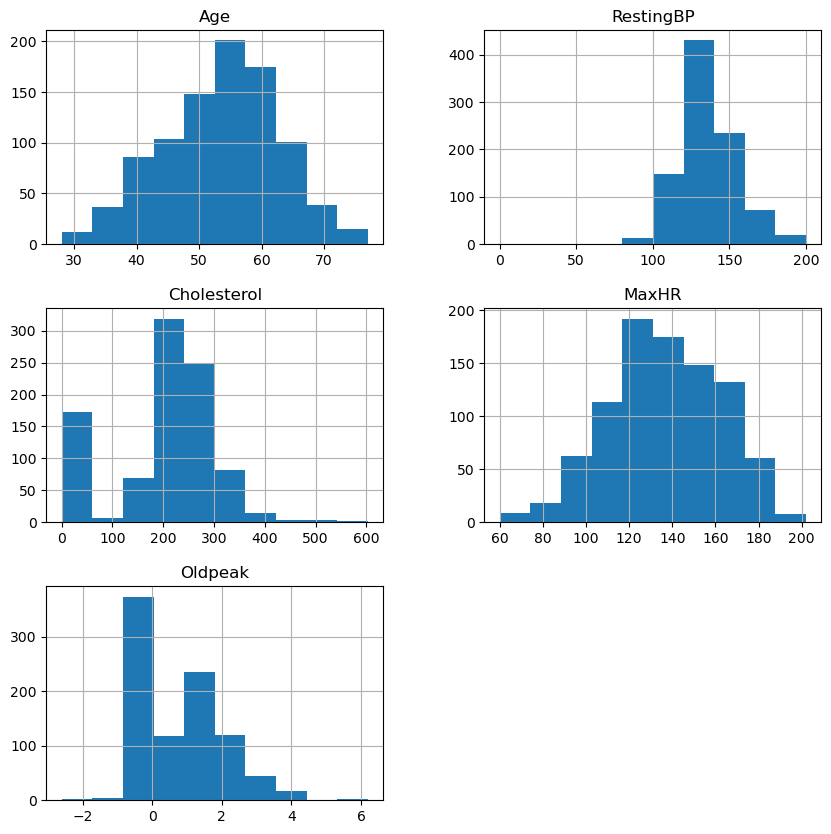

In [347]:
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

df[features].hist(figsize=(10, 10));

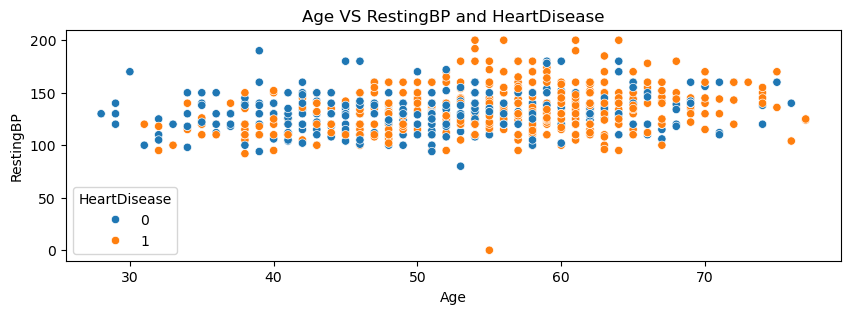

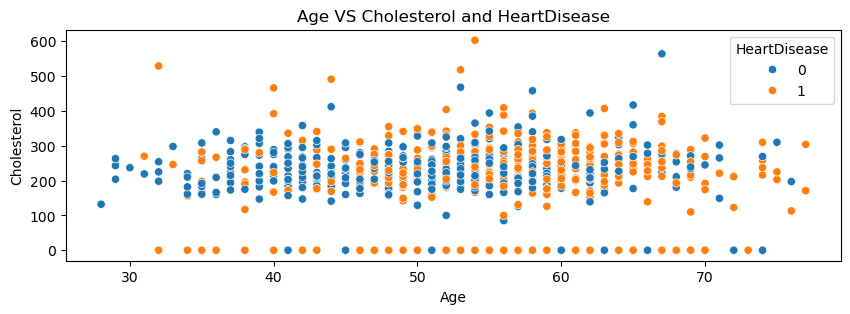

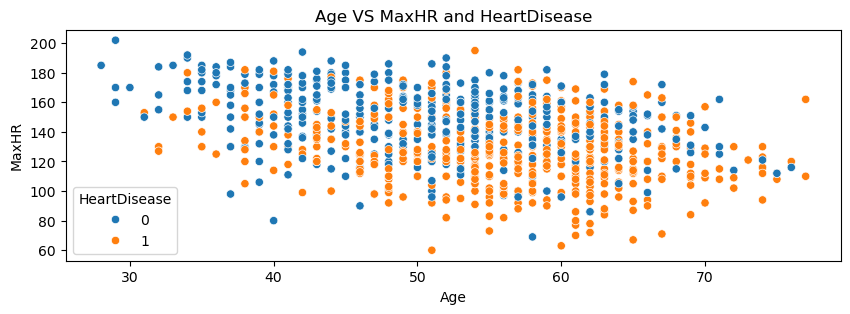

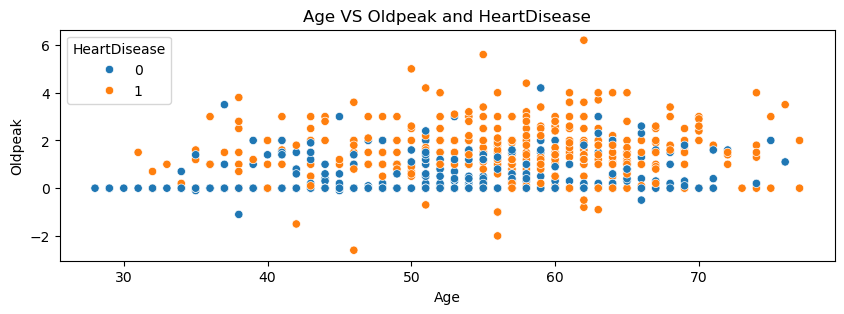

In [368]:
num_col = ['RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

disease_conditions = ['HeartDisease']

for disease in disease_conditions:
    for variable in num_col:
        plt.figure(figsize=(10, 3))
        #sns.cplot(data=df, x=variable, hue=disease, palette='magma')
        sns.scatterplot(y=variable, x='Age', hue='HeartDisease', data=df)
        plt.title(f'Age VS {variable} and {disease}')
        
        plt.show()


### 2-Categorical Columns

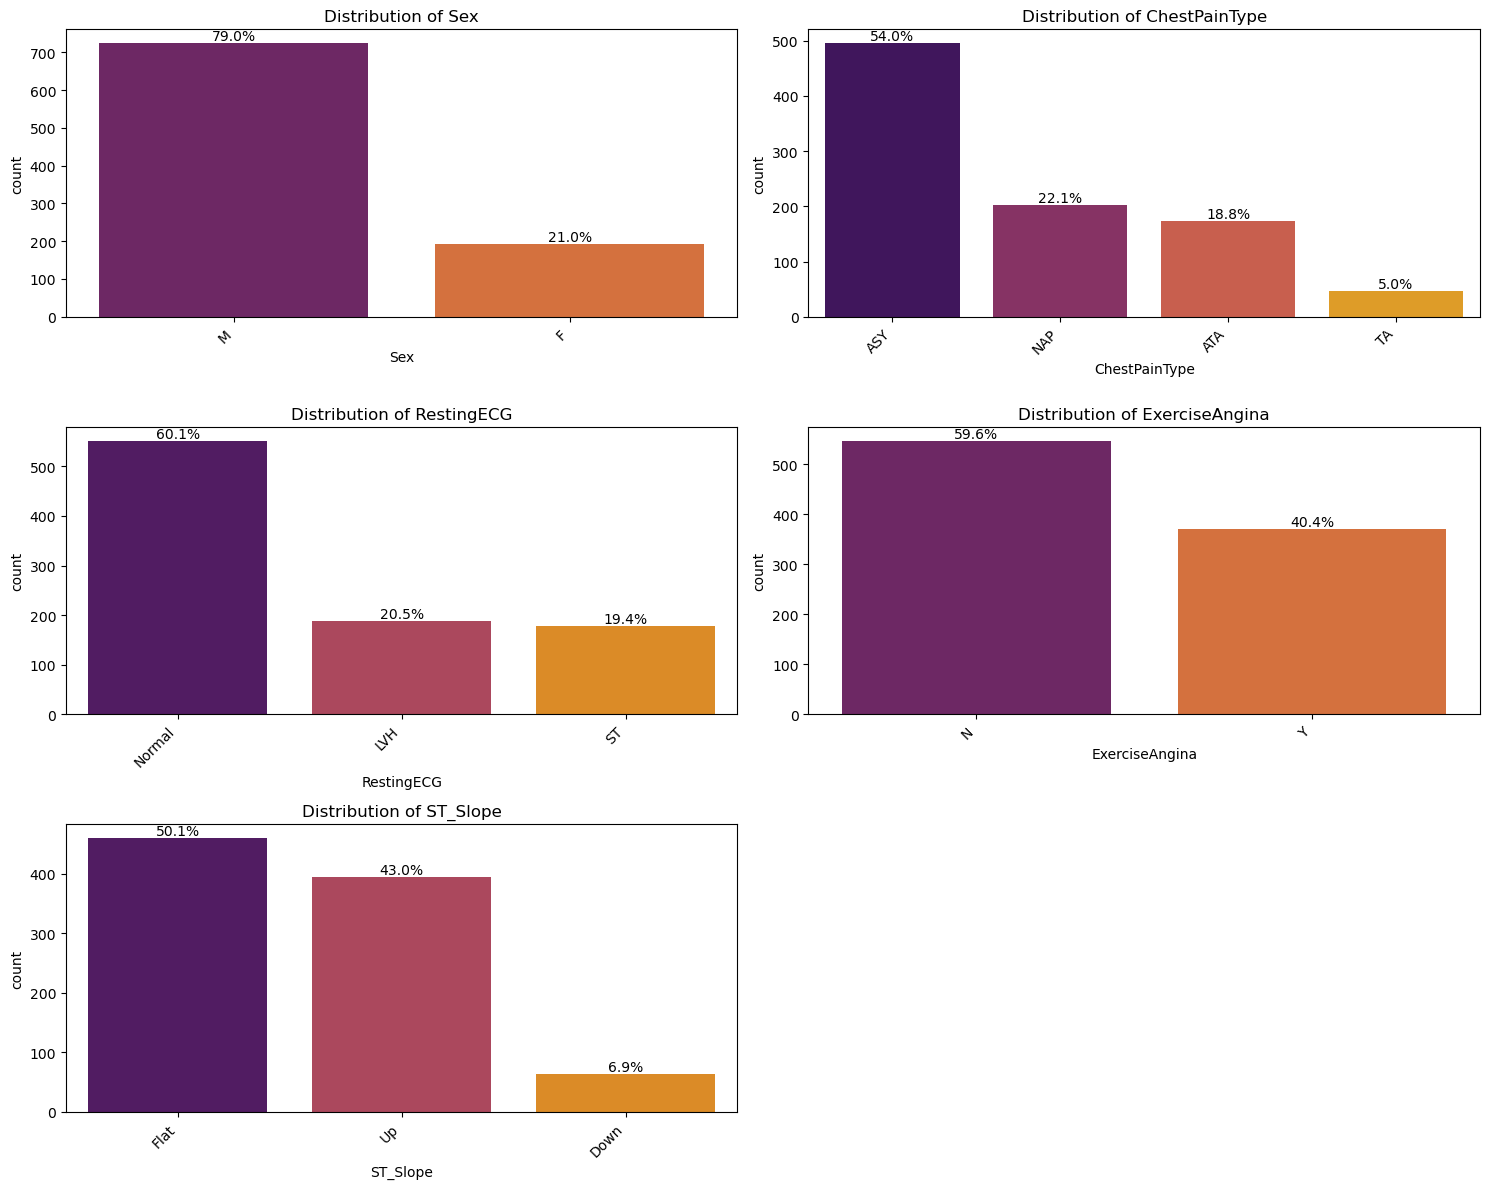

In [352]:
cat_columns = ['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(cat_columns, 1):  
    plt.subplot(3, 2, i)  # 2 rows and 2 columns
    order = df[variable].value_counts().index
    ax = sns.countplot(x=variable, data=df, order=order, palette='inferno')

    # Add percentage annotations
    total = len(df[variable])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {variable}')

plt.tight_layout()
plt.show()


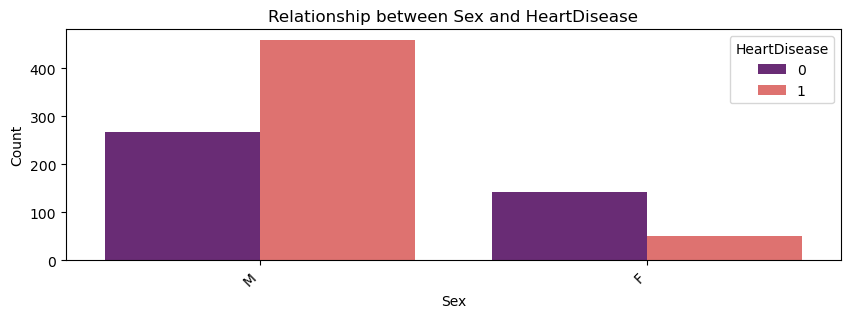

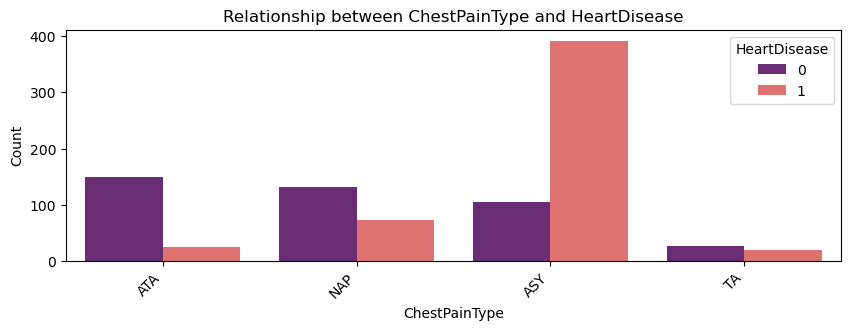

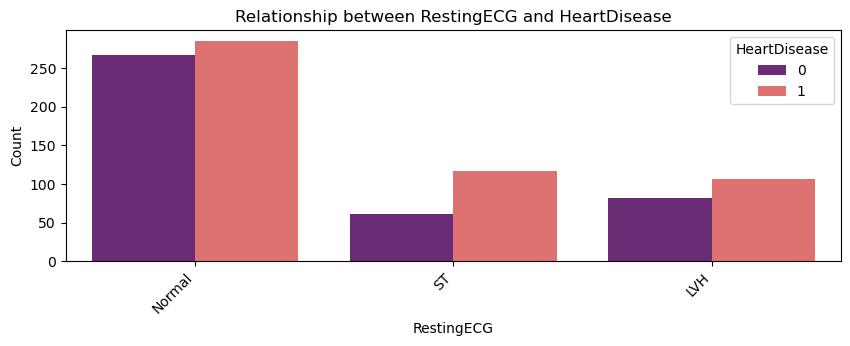

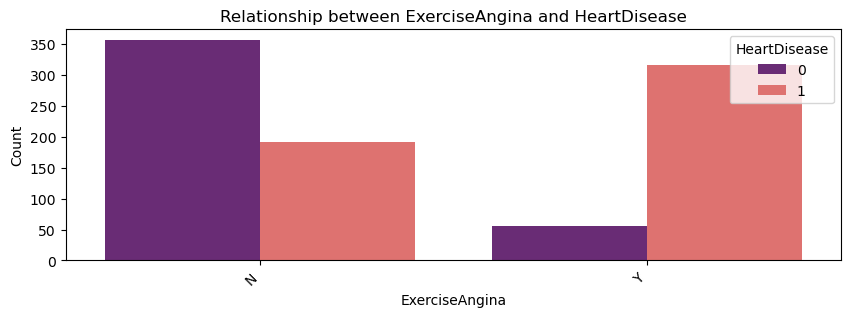

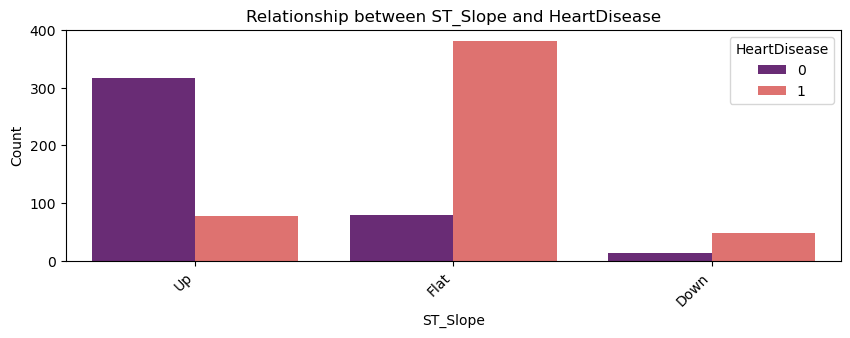

In [367]:
selected_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
disease_conditions = ['HeartDisease']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 3))
        sns.countplot(data=df, x=variable, hue=disease, palette='magma')
        plt.title(f'Relationship between {variable} and {disease}')
        plt.xlabel(variable)
        plt.ylabel('Count')
        plt.legend(title=disease, loc='upper right')
        plt.xticks(rotation=45, ha='right')
        plt.show()


<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="5"></a>
# <font color='green'> 🛠 Feature Engineering:</font>


In [759]:
dobject= df.select_dtypes(include="object")
dnumeric= df.select_dtypes(exclude='object')

In [760]:
la= LabelEncoder()

In [761]:
for i in range(0,dobject.shape[1]):
    dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [762]:
df=pd.concat([dobject,dnumeric],axis=1)

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="6"></a>
# <font color='green'> 🔭 Explore correlations between features:</font>


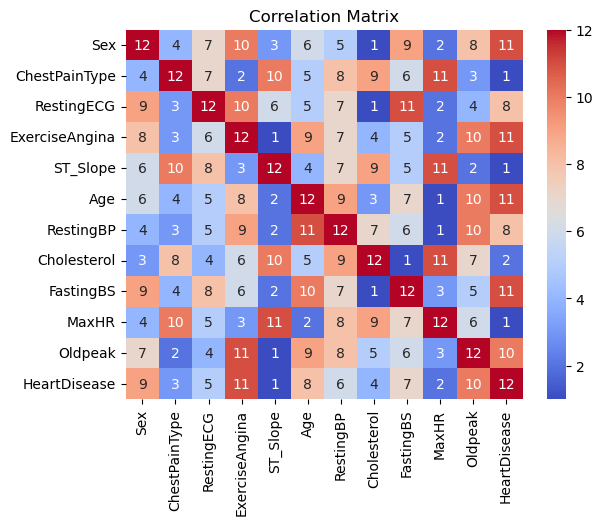

In [763]:
#plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix.rank(axis='columns'), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="7"></a>
# <font color='green'> 🏗 Model Building:</font>

In [764]:
X = df.drop(["HeartDisease",'Oldpeak'], axis=1)
y = df["HeartDisease"]

In [798]:

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state = 1 )

In [799]:
X_train.shape

(734, 10)

In [800]:
X_test.shape

(184, 10)

### 1) Support Vector Machine Model :-

In [801]:
svm_model= SVC(kernel='linear', C=0.1, random_state=3)

In [802]:
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=3)

In [803]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        74
           1       0.92      0.91      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



### 2) K-Nearest Neighbour MODEL :-

In [804]:
knn_model= KNeighborsClassifier(n_neighbors=7,weights='uniform',
    algorithm='ball_tree',
    leaf_size=30,
    p=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,)

In [805]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, p=1)

In [806]:
y_pred= knn_model.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        74
           1       0.79      0.73      0.76       110

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184



### 3) Logistic Regression MODEL :-

In [810]:
log_model= LogisticRegression( max_iter=90)

In [811]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=90)

In [812]:
y_pred= log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        74
           1       0.93      0.90      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



### 4) Naive Bayes MODEL :-

In [813]:
nb_model= GaussianNB()

In [814]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [815]:
y_pred= nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        74
           1       0.90      0.88      0.89       110

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.87      0.87       184



### 5) Decision Tree MODEL :-

In [816]:
tree_model= tree.DecisionTreeClassifier()

In [817]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [818]:
y_pred= tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        74
           1       0.85      0.78      0.82       110

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.79      0.79       184



### 6) Random Forest MODEL :-

In [893]:
rf_model= RandomForestClassifier(n_estimators= 20, min_samples_leaf= 20, max_depth= 30, criterion= 'gini', max_features= "sqrt" )

In [894]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=20, n_estimators=20)

In [895]:
y_pred= rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        74
           1       0.91      0.94      0.92       110

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



### 7) Neural Network MODEL :-

In [875]:
nn_model=MLPClassifier( hidden_layer_sizes=150,
    activation='identity',
    solver= 'lbfgs', )

In [876]:
nn_model.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=150, solver='lbfgs')

In [877]:
y_pred= nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.93      0.91      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



### 8) Linear Discriminant Analysis MODEL :-

In [840]:
lda_model=LinearDiscriminantAnalysis( solver='eigen',store_covariance=True)
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='eigen', store_covariance=True)

In [841]:
y_pred= lda_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        74
           1       0.93      0.90      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



### 9) Gradient Boosting Classifier MODEL :-

In [830]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [831]:
y_pred= gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        74
           1       0.92      0.90      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### 10) Ada Boost Classifier MODEL :-

In [832]:
ad_model=AdaBoostClassifier(algorithm='SAMME', n_estimators=90)
ad_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=90)

In [833]:
y_pred= ad_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        74
           1       0.92      0.89      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



<a id="0"></a>
##### [<font color='red'>Move To Top</font>](#0)

<a id="8"></a>
# <font color='green'> 🥇 BEST MODEL:</font>

#### As we can see Random Forest Model Gives us a better accuracy.

# Save Model :

In [896]:
f_name='heart_disease.sav'

In [897]:
pickle.dump(rf_model,open(f_name,'wb'))
print("model saved!!!")

model saved!!!
